# Diagnosis of Hepatitis Disease using Machine Learning

## `Required Packages`
These are the packages that we are going to use in this file.
It include:- 
* Pandas
* Numpy
* Seaborn
* Maltplotlib
* Scikit learn
* Imbalanced Learn
* Warnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, metrics
from sklearn.metrics import ConfusionMatrixDisplay,auc, confusion_matrix, classification_report, roc_curve, accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler,Normalizer, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

## `File path of Dataset`

In [9]:
file_path = "Data/hepatitis_dataset_modified.csv"
data = pd.read_csv(file_path)
data = data.drop(columns = "Unnamed: 0", axis=1)

## `Information about our Dataset`

#### Basic details of the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver Big        145 non-null    float64
 9   Liver Firm       144 non-null    float64
 10  Spleen Palpable  150 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascities         150 non-null    float64
 13  Varices          150 non-null    float64
 14  Bilirubin        149 non-null    float64
 15  ALK Poshphate    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  Albumin         

#### Display the data

In [23]:
# print the head i.e, top 5 row of the file
print(data.head())

   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0      2   30    2      1.0           2      2.0      2.0       2.0   
1      2   50    1      1.0           2      1.0      2.0       2.0   
2      2   78    1      2.0           2      1.0      2.0       2.0   
3      2   31    1      NaN           1      2.0      2.0       2.0   
4      2   34    1      2.0           2      2.0      2.0       2.0   

   Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascities  Varices  \
0        1.0         2.0              2.0      2.0       2.0      2.0   
1        1.0         2.0              2.0      2.0       2.0      2.0   
2        2.0         2.0              2.0      2.0       2.0      2.0   
3        2.0         2.0              2.0      2.0       2.0      2.0   
4        2.0         2.0              2.0      2.0       2.0      2.0   

   Bilirubin  ALK Poshphate   SGOT  Albumin  Protime  Histology  
0        1.0           85.0   18.0      4.0      NaN          1  
1 

#### Prints all the basic mathematic static of dataset

In [28]:
data.describe()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


#### Shape of the Data

In [33]:
data.shape

(155, 20)

#### Count of `missing values` in the dataset

In [37]:
data.isnull().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascities            5
Varices             5
Bilirubin           6
ALK Poshphate      29
SGOT                4
Albumin            16
Protime            67
Histology           0
dtype: int64

## `Data Preprocessing`
We're going to remove the rows with NaN Values and do some Class Balancing using SMOTE

If the null values in the data is marked as `?` , we will use this method before going into the below steps.

`data.replace('?', pd.NA, inplace=True)`

#### Remove the rows with null value.
We're droping the row with null value using dropna.This will help clean the data so that the model can learn better.

In [42]:
modified_data = data
modified_data.dropna(inplace=True)
modified_data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [44]:
# to confirm that no Null values are there.
modified_data.isnull().sum()

Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascities           0
Varices            0
Bilirubin          0
ALK Poshphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
dtype: int64

#### Working on outliers.

In [47]:
def show_outlier(modified_data,feature):
    # Calculate the first quartile (Q1)
    Q1 = modified_data[feature].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = modified_data[feature].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1 * IQR

    # Identify outliers
    outliers = modified_data[modified_data['Age'] > upper_bound]
    details = [Q1,Q3,IQR, upper_bound, outliers]
    
    return details
    

In [49]:
# To verify the result
details = show_outlier(modified_data, "Age")
upper_bound = details[3]
print(details[4])
# Removing the outliers
modified_data= modified_data[modified_data['Age']< upper_bound]

#modified_data = modified_data.drop(133) ## Alternative way to drop the outlier as we know the id of that instance.

     Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
133      2   72    1      2.0           1      1.0      2.0       2.0   

     Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascities  Varices  \
133        2.0         1.0              2.0      2.0       2.0      2.0   

     Bilirubin  ALK Poshphate  SGOT  Albumin  Protime  Histology  
133        1.0          115.0  52.0      3.4     50.0          2  


## `Class Balancing`

#### Number of  Male and Female after filtering.

In [55]:
modified_data["Class"].value_counts()

Class
2    66
1    13
Name: count, dtype: int64

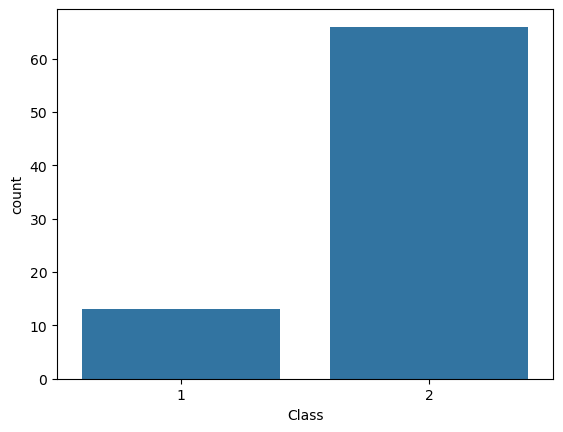

In [72]:
sns.countplot(modified_data, x = "Class");

From above result we can see that the class is imbalace, so we're going to do some class balancing technique and other preprocessing method

#### Here we're going to use `SMOTE(Synthetic Minority Oversampling Technique)` for Class Balancing.

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [58]:
x = modified_data.drop(['Class'], axis=1)
y = modified_data['Class']
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(x,y)
X_res["Class"]=y_res
data_smote = X_res

In [60]:
data_smote["Class"].value_counts()

Class
2    66
1    66
Name: count, dtype: int64

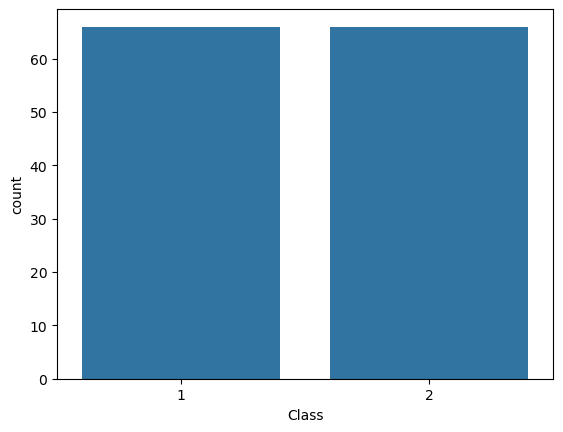

In [78]:
sns.countplot(data_smote, x = "Class");

## `Preprocessing Data`

#### Here we are using `Standard Scalar `
We are using StandardScalar() on following features:
* ALK Poshphate
* Protime

In [68]:
standard_scalar = StandardScaler()
data_smote["ALK Poshphate"]= standard_scalar.fit_transform(data_smote["ALK Poshphate"].values.reshape(-1,1))
data_smote["Protime"]= standard_scalar.fit_transform(data_smote["Protime"].values.reshape(-1,1))
data_smote.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology,Class
0,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,-0.314279,28.0,4.0,0.942746,1,2
1,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,-0.615324,30.0,4.4,1.398985,1,2
2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,-0.951787,249.0,3.7,-0.015357,1,2
3,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,-0.562199,60.0,3.9,-0.106605,1,2
4,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,-0.987204,144.0,4.9,1.079618,1,2


## `Visualization`

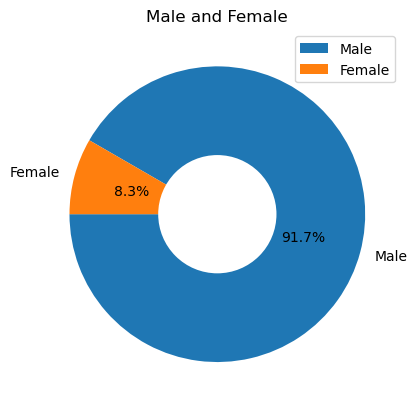

In [83]:
# Pie Chart of Sex Distribution

plt.pie(data_smote["Sex"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%", startangle=180)
center_circle=plt.Circle((0,0),0.40,fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Male and Female")
plt.legend()
plt.show()